- Author: Maximiliano Lopez Salgado
- First Commit: 2023-06-20                      #folowing ISO  8601 Format
- Last Commit: 2023-06-20                       #folowing ISO  8601 Format
- Description: This notebook is used to perform EDA on the Superstore dataset

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium import plugins
import sqlite3

# Exploratory Data Analysis (EDA)

## 1. Understanding the data

### 1.1 Gathering data

In [30]:
# Import csv cleaned files 
order = pd.read_csv('../datasets/order.csv', encoding='latin1')
customer = pd.read_csv('../datasets/customer.csv', encoding='latin1')
shipment = pd.read_csv('../datasets/shipment.csv', encoding='latin1')
product = pd.read_csv('../datasets/product.csv', encoding='latin1')
stock = pd.read_csv('../datasets/stock.csv', encoding='latin1')

### 1.2 Assesing data

In [31]:
# Take a look of the data´s shape
display(order.info)
display(customer.info)
display(shipment.info)
display(product.info)
display(stock.info)

<bound method DataFrame.info of             order_id  order_date  shipment_code customer_id          product
0     CA-2016-152156   11/8/2016              1    CG-12520  FUR-BO-10001798
1     CA-2016-152156   11/8/2016              2    CG-12520  FUR-CH-10000454
2     CA-2016-138688   6/12/2016              3    DV-13045  OFF-LA-10000240
3     US-2015-108966  10/11/2015              4    SO-20335  FUR-TA-10000577
4     US-2015-108966  10/11/2015              5    SO-20335  OFF-ST-10000760
...              ...         ...            ...         ...              ...
9989  CA-2014-110422   1/21/2014           9990    TB-21400  FUR-FU-10001889
9990  CA-2017-121258   2/26/2017           9991    DB-13060  FUR-FU-10000747
9991  CA-2017-121258   2/26/2017           9992    DB-13060  TEC-PH-10003645
9992  CA-2017-121258   2/26/2017           9993    DB-13060  OFF-PA-10004041
9993  CA-2017-119914    5/4/2017           9994    CC-12220  OFF-AP-10002684

[9994 rows x 5 columns]>

<bound method DataFrame.info of      customer_id     customer_name    segment
0       CG-12520       Claire Gute   Consumer
1       CG-12520       Claire Gute   Consumer
2       DV-13045   Darrin Van Huff  Corporate
3       SO-20335    Sean O'Donnell   Consumer
4       SO-20335    Sean O'Donnell   Consumer
...          ...               ...        ...
9989    TB-21400  Tom Boeckenhauer   Consumer
9990    DB-13060       Dave Brooks   Consumer
9991    DB-13060       Dave Brooks   Consumer
9992    DB-13060       Dave Brooks   Consumer
9993    CC-12220      Chris Cortes   Consumer

[9994 rows x 3 columns]>

<bound method DataFrame.info of       ship_id   ship_date       ship_mode        country             city  \
0           1  11/11/2016    Second Class  United States        Henderson   
1           2  11/11/2016    Second Class  United States        Henderson   
2           3   6/16/2016    Second Class  United States      Los Angeles   
3           4  10/18/2015  Standard Class  United States  Fort Lauderdale   
4           5  10/18/2015  Standard Class  United States  Fort Lauderdale   
...       ...         ...             ...            ...              ...   
9989     9990   1/23/2014    Second Class  United States            Miami   
9990     9991    3/3/2017  Standard Class  United States       Costa Mesa   
9991     9992    3/3/2017  Standard Class  United States       Costa Mesa   
9992     9993    3/3/2017  Standard Class  United States       Costa Mesa   
9993     9994    5/9/2017    Second Class  United States      Westminster   

           state  postal_code region  
0   

<bound method DataFrame.info of            product_id         category sub-category  \
0     FUR-BO-10001798        Furniture    Bookcases   
1     FUR-CH-10000454        Furniture       Chairs   
2     OFF-LA-10000240  Office Supplies       Labels   
3     FUR-TA-10000577        Furniture       Tables   
4     OFF-ST-10000760  Office Supplies      Storage   
...               ...              ...          ...   
9989  FUR-FU-10001889        Furniture  Furnishings   
9990  FUR-FU-10000747        Furniture  Furnishings   
9991  TEC-PH-10003645       Technology       Phones   
9992  OFF-PA-10004041  Office Supplies        Paper   
9993  OFF-AP-10002684  Office Supplies   Appliances   

                                           product_name     price  quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200     

<bound method DataFrame.info of             order_id       product_id  stock_id
0     CA-2016-152156  FUR-BO-10001798       NaN
1     CA-2016-152156  FUR-CH-10000454       NaN
2     CA-2016-138688  OFF-LA-10000240       NaN
3     US-2015-108966  FUR-TA-10000577       NaN
4     US-2015-108966  OFF-ST-10000760       NaN
...              ...              ...       ...
9989  CA-2014-110422  FUR-FU-10001889       NaN
9990  CA-2017-121258  FUR-FU-10000747       NaN
9991  CA-2017-121258  TEC-PH-10003645       NaN
9992  CA-2017-121258  OFF-PA-10004041       NaN
9993  CA-2017-119914  OFF-AP-10002684       NaN

[9994 rows x 3 columns]>

In [32]:
# Take a look of the data´s info
display(order.info())
display(customer.info())
display(shipment.info())
display(product.info())
display(stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       9994 non-null   object
 1   order_date     9994 non-null   object
 2   shipment_code  9994 non-null   int64 
 3   customer_id    9994 non-null   object
 4   product        9994 non-null   object
dtypes: int64(1), object(4)
memory usage: 390.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    9994 non-null   object
 1   customer_name  9994 non-null   object
 2   segment        9994 non-null   object
dtypes: object(3)
memory usage: 234.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ship_id      9994 non-null   int64 
 1   ship_date    9994 non-null   object
 2   ship_mode    9994 non-null   object
 3   country      9994 non-null   object
 4   city         9994 non-null   object
 5   state        9994 non-null   object
 6   postal_code  9994 non-null   int64 
 7   region       9994 non-null   object
dtypes: int64(2), object(6)
memory usage: 624.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    9994 non-null   object 
 1   category      9994 non-null   object 
 2   sub-category  9994 non-null   object 
 3   product_name  9994 non-null   object 
 4   price         9994 non-null   float64
 5   quantity      9994 non-null   int64  
 6   discount      9994 non-null   float64
 7   profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 624.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    9994 non-null   object 
 1   product_id  9994 non-null   object 
 2   stock_id    0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 234.4+ KB


None

In [33]:
# Use describe method to get descriptive statistics
display(order.describe())
display(customer.describe())
display(shipment.describe())
display(product.describe())
display(stock.describe())

,shipment_code
count,9994.000000
mean,4997.500000
std,2885.163629
min,1.000000
25%,2499.250000
50%,4997.500000
75%,7495.750000
max,9994.000000


,customer_id,customer_name,segment
count,9994,9994,9994
unique,793,793,3
top,WB-21850,William Brown,Consumer
freq,37,37,5191


,ship_id,postal_code
count,9994.000000,9994.000000
mean,4997.500000,55190.379428
std,2885.163629,32063.693350
min,1.000000,1040.000000
25%,2499.250000,23223.000000
50%,4997.500000,56430.500000
75%,7495.750000,90008.000000
max,9994.000000,99301.000000


,price,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


,stock_id
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## 2. Extracting and Plotting the data

From the dataframes we have, here are some potential information we can extract:

**DataFrame 1: Customer**
- Check the distribution of customers across different segments.
- Explore the unique values and their frequencies in the 'customer_name' column.
- Analyze the customer_id distribution and check for any inconsistencies.
- Pie plot: Plot the count of customers in each segment to visualize the distribution of customer segments.
- Descriptive statistics about "customer_id" column

**DataFrame 2: Shipment**
- Examine the distribution of shipments across different shipping modes.
- Explore the countries, cities, and regions represented in the dataset.
- Analyze the distribution of shipments over time using the 'ship_date' column.
- Bar plot: Plot the count of shipments for each shipping mode to analyze the popularity of different shipping modes.
- Pie chart: Visualize the distribution of shipments across different regions using a pie chart.

**DataFrame 3: Product**
- Analyze the product categories and sub-categories present in the dataset.
- Explore the price distribution and identify any outliers or unusual patterns.
- Check the distribution of quantities and discounts.
- Bar plot: Plot the count of products in each category or sub-category to understand the product distribution.
- Box plot: Analyze the price distribution of products and identify any outliers or variations across categories.

**DataFrame 4: Order**
- Examine the distribution of orders by order_date.
- Analyze the relationship between shipment_code and the corresponding shipments.
- Explore the distribution of products in orders and identify popular products.
- Line plot: Plot the count of orders over time using the order_date column to observe any trends or seasonality.
- Bar plot: Visualize the count of products in each order to understand the order composition.

## DataFrame 1: Customer

In [35]:
# Check the distribution of customers across different segments.
customer['segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

In [47]:
# Explore the unique values and their frequencies in the 'customer_name' column.
customer['customer_name'].value_counts().head(10)

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: customer_name, dtype: int64

In [50]:
# Analyze the customer_id distribution and check for any inconsistencies.
customer['customer_id'].value_counts().head(10)


WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
SV-20365    32
JD-15895    32
EH-13765    32
ZC-21910    31
EP-13915    31
Name: customer_id, dtype: int64

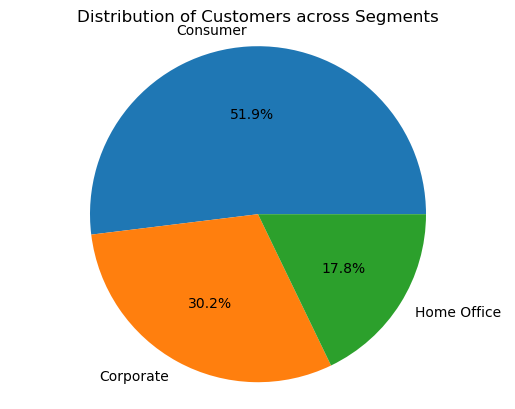

In [57]:
# Pie plot: Plot the count of customers in each segment to visualize the distribution of customer segments.
segment_counts = customer['segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Customers across Segments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

In [52]:
# Descriptive statistics about "customer_id" column
customer['customer_id'].describe()


count         9994
unique         793
top       WB-21850
freq            37
Name: customer_id, dtype: object

## DataFrame 2: Shipment

In [ ]:
# Examine the distribution of shipments across different shipping modes.


In [ ]:
# Explore the countries, cities, and regions represented in the dataset.


In [ ]:
# Analyze the distribution of shipments over time using the 'ship_date' column.


In [ ]:
# Bar plot: Plot the count of shipments for each shipping mode to analyze the popularity of different shipping modes.


In [ ]:
# Pie chart: Visualize the distribution of shipments across different regions using a pie chart.

## DataFrame 3: Product

In [ ]:
# Analyze the product categories and sub categories present in the dataset.


In [ ]:
# Explore the price distribution and identify any outliers or unusual patterns.


In [ ]:
# Check the distribution of quantities and discounts.


In [ ]:
# Bar plot: Plot the count of products in each category or sub category to understand the product distribution.


In [ ]:
# Box plot: Analyze the price distribution of products and identify any outliers or variations across categories.

## DataFrame 4: Order

In [ ]:
# Examine the distribution of orders by order_date.


In [ ]:
# Analyze the relationship between shipment_code and the corresponding shipments.


In [ ]:
# Explore the distribution of products in orders and identify popular products.


In [ ]:
# Line plot: Plot the count of orders over time using the order_date column to observe any trends or seasonality.


In [ ]:
# Bar plot: Visualize the count of products in each order to understand the order composition.